### 진행 순서

- 데이터셋 **로드, 전처리** -> **토큰화** 하기 -> 트랜스포머's **모델 로드**, **훈련**, **추론** -> **모델 평가**
- 🤗데이터셋, 🤗토크나이저, 🤗트랜스포머 라이브러리 이용


### 데이터셋

[🤗데이터셋 docs🤗](https://huggingface.co/docs/datasets/index)

```py
load_dataset("파일 형식(csv,text,json 등..)", data_files="경로")

# ex 예시
load_dataset(
    "csv",
    data_files="file.csv",
    sep=";",
    name=["text","label"])
```

In [39]:
from datasets import load_dataset

dataset = load_dataset("emotion")

In [40]:
dataset # 아파치 애로우 형식 : 하나의 행이 하나의 딕셔너리

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

> 아파치 애로우 형식: 시스템과 프로그래밍 언어 간에 데이터를 효율적으로 교환할 수 있는 컬럼형 인메모리 데이터 형식

In [41]:
dataset['train']['text'][0]

'i didnt feel humiliated'

In [42]:
train_data = dataset['train']

In [43]:
len(train_data), 

(16000,)

### 데이터 셋 to Dataframe

In [44]:
import pandas as pd 

train_data.set_format(type="pandas")
df = train_data[:]

In [45]:
df['label_name'] = df['label'].apply(lambda x: train_data.features["label"].int2str(x))

In [46]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


### **데이터 클래스 분포 확인**

- 데이터 불균형 샘플링 기법
    - [📝내용 설명📝](https://github.com/tommyjin2894/ai_study?tab=readme-ov-file#%EC%83%98%ED%94%8C%EB%A7%81-%EA%B8%B0%EB%B2%95)
    - [🖥️상세 코드🖥️](https://github.com/tommyjin2894/ai_study/blob/main/code/00_basics/09_%EC%83%98%ED%94%8C%EB%A7%81.ipynb) 


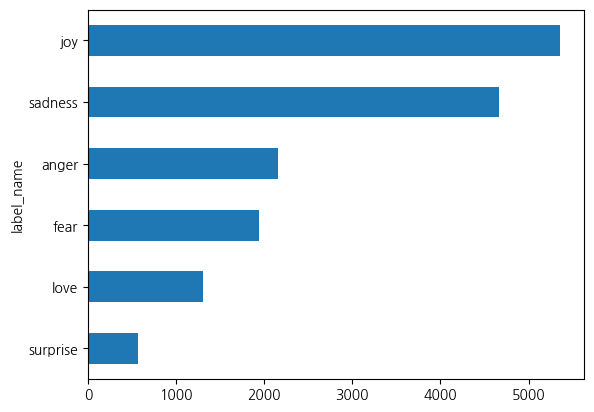

In [47]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh();

In [48]:
X = df.drop(columns=["label","label_name"])
y = df["label"]


In [49]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

ros = RandomOverSampler(random_state=42)
rus = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(train_x, train_y)
x_rous, y_rous = ros.fit_resample(x_ros, y_ros)

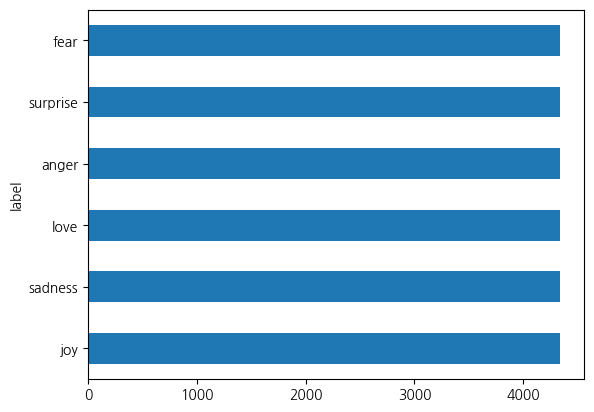

In [61]:
y_rous.apply(lambda x: train_data.features["label"].int2str(x))\
    .value_counts(ascending=True).plot.barh();